In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [4]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
#split dataset in features and target variable
feature_cols = [ 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [7]:
# Assuming fdataset is your DataFrame
df = df.drop(0, axis=0)

# Resetting the index after removing the first row
df = df.reset_index(drop=True)

In [8]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df = df.drop('pregnant', axis=1)

In [10]:
df.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [11]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)



In [12]:
#split dataset in features and target variable
feature_cols = [ 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

In [13]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [14]:
sns.countplot(x='label', data=df, palette='hls')
plt.title('Count of Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Count')

# Save the plot
plt.savefig('diabetes_count_plot.png')

# Show plot
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[111,  14],
       [ 28,  39]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

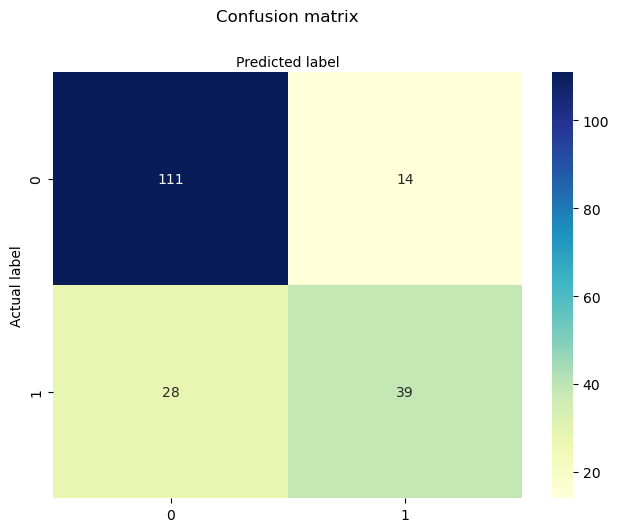

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.80      0.89      0.84       125
   with diabetes       0.74      0.58      0.65        67

        accuracy                           0.78       192
       macro avg       0.77      0.74      0.75       192
    weighted avg       0.78      0.78      0.77       192



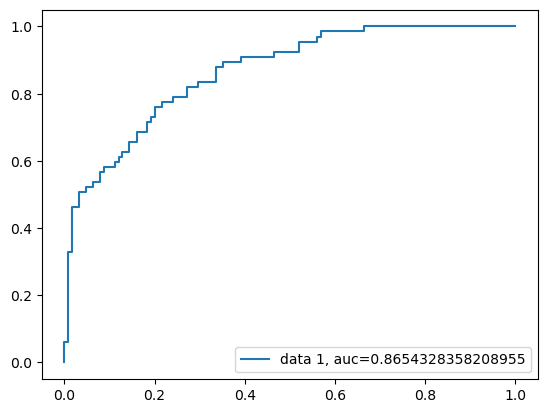

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Convert string labels to numeric format
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

# Get predicted probabilities from the model
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = metrics.roc_curve(y_test_numeric, y_pred_proba)
auc = metrics.roc_auc_score(y_test_numeric, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
df.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


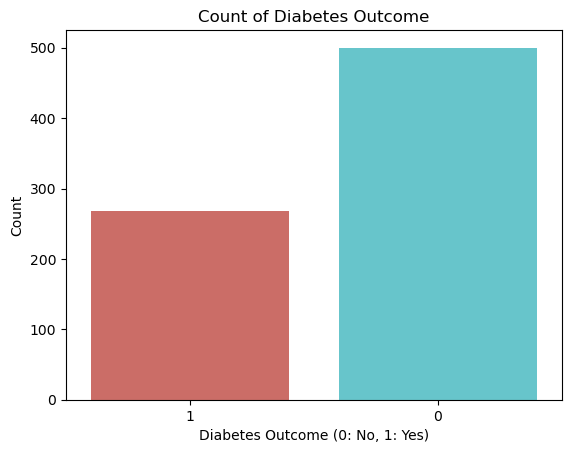

In [ ]:
sns.countplot(x='label', data=df, palette='hls')
plt.title('Count of Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Count')

# Save the plot
plt.savefig('diabetes_count_plot.png')

# Show plot
plt.show()